In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
data = pd.read_csv('C:/Users/admin/Videos/Equity-INFY-EQ-03-01-2019-to-03-01-2020.csv', parse_dates=[0], index_col=[0])

In [3]:
df = data[['Close']]

In [4]:
data_training = df.loc['2019-10-30':'2019-01-03',:]['Close']
data_test = df.loc['2020-01-03':'2019-10-31',:]['Close']

In [5]:
x_train = []
y_train = []

In [6]:
for i in range(5, len(data_training)-5):
    x_train.append(data_training[i-5:i])
    y_train.append(data_training[i:i+5])

In [7]:
x_test = []
y_test = []

In [8]:
for i in range(5, len(data_test)-5):
    x_test.append(data_test[i-5:i])
    y_test.append(data_test[i:i+5])

In [9]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_test , y_test = np.array(x_test), np.array(y_test)

In [10]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)
x_test = x_scaler.fit_transform(x_test)
y_test = y_scaler.fit_transform(y_test)

In [11]:
x_train = x_train.reshape(191,5,1)

In [12]:
reg = Sequential()

reg.add(LSTM(units=150, activation='relu', return_sequences=True, input_shape=(5,1)))

reg.add(LSTM(units=41, activation='relu'))
reg.add(Dropout(0.2))

reg.add(Dense(5))



In [13]:
reg.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [14]:
reg.fit(x_train, y_train, epochs=200, batch_size=5)

Train on 191 samples
Epoch 1/200
191/191 [==============================] - 5s 24ms/sample - loss: 0.1597 - accuracy: 0.2304
Epoch 2/200
191/191 [==============================] - 1s 3ms/sample - loss: 0.0333 - accuracy: 0.2723TA: 0s - loss: 0.0245 
Epoch 3/200
191/191 [==============================] - 0s 2ms/sample - loss: 0.0317 - accuracy: 0.3351
Epoch 4/200
191/191 [==============================] - 0s 3ms/sample - loss: 0.0312 - accuracy: 0.3455
Epoch 5/200
191/191 [==============================] - 1s 3ms/sample - loss: 0.0270 - accuracy: 0.3717
Epoch 6/200
191/191 [==============================] - 1s 3ms/sample - loss: 0.0246 - accuracy: 0.2723
Epoch 7/200
191/191 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.24 - 0s 2ms/sample - loss: 0.0238 - accuracy: 0.2513
Epoch 8/200
191/191 [==============================] - 0s 2ms/sample - loss: 0.0257 - accuracy: 0.2513
Epoch 9/200
191/191 [==============================] - 0s 3ms/sample - loss: 0.0236 - accu

In [18]:
x_test = x_test.reshape(35,5,1)

In [19]:
y_pred = reg.predict(x_test)

In [20]:
y_test = y_scaler.inverse_transform(y_test)

In [21]:
y_pred.shape, y_test.shape

((35, 5), (35, 5))

In [22]:
y_pred = y_scaler.inverse_transform(y_pred)

In [23]:
from sklearn.metrics import mean_squared_error 

In [24]:
def evaluating_model(y_test,y_pred):
    scores=[]
    
    for i in range(y_test.shape[1]):
        mse = mean_squared_error(y_test[:,i], y_pred[:,i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
        
    return scores

In [25]:
evaluating_model(y_test,y_pred)

[7.942394676421415,
 9.862198609194463,
 10.751808687184155,
 11.236444379350752,
 10.919847683186156]

In [28]:
np.std(y_test[0]), np.std(y_test[1]), np.std(y_test[2])

(2.918321435346, 2.3947860029656005, 1.7930421077041254)

In [31]:
pred = y_pred.reshape(175,1)
test = y_test.reshape(175,1)

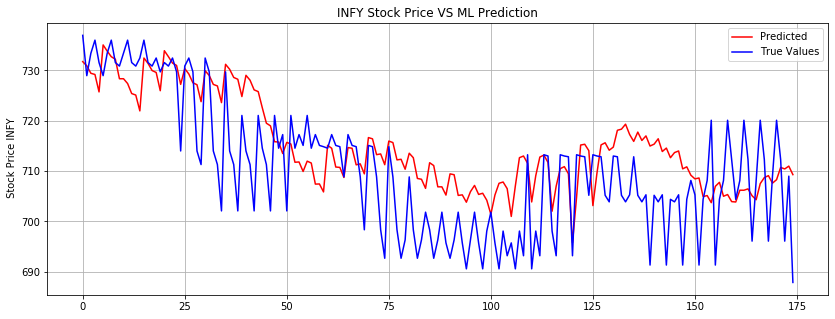

In [37]:
plt.figure(figsize=(14,5))
plt.plot(pred, color='red', label='Predicted')
plt.plot(test, color='blue', label='True Values')
plt.legend()
plt.ylabel(' Stock Price INFY')
plt.title('INFY Stock Price VS ML Prediction')
plt.grid()